Task 1: Data Exploration and Preparation

Loaded the CIFAR-10 dataset which contains 60,000 color images (32x32) in 10 classes.

Displayed 5 sample images with their labels using matplotlib.

Printed the shapes of training and test sets:
x_train.shape = (50000, 32, 32, 3), y_train.shape = (50000, 1)

Verified that there are 10 unique labels using np.unique(y_train).

Normalized the image pixel values to the range [0, 1] by dividing by 255.

Split the training data into 80% training and 20% validation using train_test_split.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


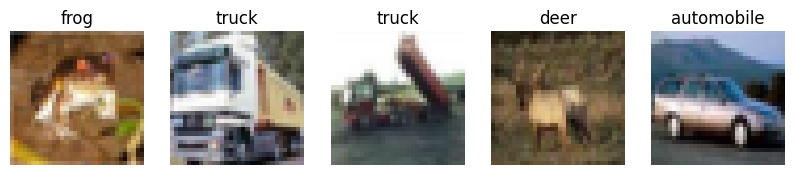

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [6]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display 5 sample images with labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Unique label count
print("Unique labels:", np.unique(y_train))

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


Task 2: Build and Train a CNN Model

Built a simple CNN using:

2–3 blocks of Conv2D → ReLU → MaxPooling → Dropout.

Followed by Flatten → Dense → Softmax output layer.

Compiled the model using:

Loss: sparse_categorical_crossentropy

Optimizer: Adam

Metric: accuracy

Trained for 15 epochs with validation data.

Plotted training vs validation accuracy and loss.

Observation: No major overfitting. Both accuracy and loss improved steadily. Validation accuracy reached ~69%.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Split train into train/val (80/20 split)
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

# Compile
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train_new, y_train_new, epochs=15, validation_data=(x_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 54ms/step - accuracy: 0.2794 - loss: 1.9359 - val_accuracy: 0.5226 - val_loss: 1.3660
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.4745 - loss: 1.4530 - val_accuracy: 0.5716 - val_loss: 1.1911
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.5363 - loss: 1.3076 - val_accuracy: 0.5938 - val_loss: 1.1508
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.5607 - loss: 1.2293 - val_accuracy: 0.6227 - val_loss: 1.0840
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.5957 - loss: 1.1664 - val_accuracy: 0.6339 - val_loss: 1.0395
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.5987 - loss: 1.1454 - val_accuracy: 0.6585 - val_loss: 0.9888
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.6209 - loss: 1.0895 - val_accuracy: 0.6502 - val_loss: 0.9912
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.6210 -

Plot Training and Validation Curves

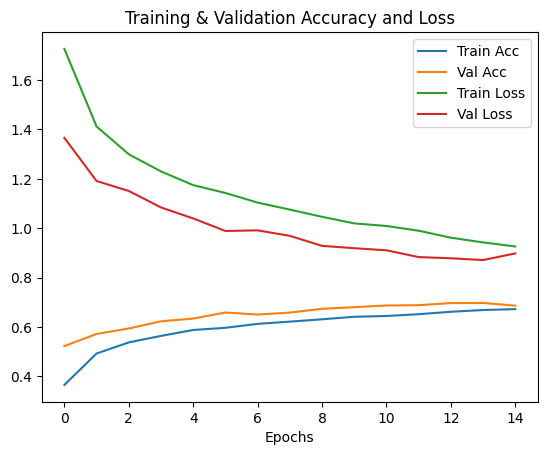

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training & Validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.show()


Task 3: Evaluate the Model

Evaluated the model on the test set using model.evaluate() to get final accuracy.

Generated a confusion matrix using confusion_matrix() from sklearn.

Created a classification report showing precision, recall, and F1-score for each class.

Showed examples of correctly and incorrectly predicted images for visual validation.

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.6892 - loss: 0.9001
Test Accuracy: 0.6859999895095825
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

    airplane       0.83      0.60      0.70      1000
  automobile       0.86      0.76      0.81      1000
        bird       0.71      0.48      0.57      1000
         cat       0.44      0.58      0.50      1000
        deer       0.64      0.65      0.64      1000
         dog       0.51      0.69      0.58      1000
        frog       0.78      0.79      0.78      1000
       horse       0.82      0.66      0.73      1000
        ship       0.74      0.85      0.79      1000
       truck       0.76      0.80      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



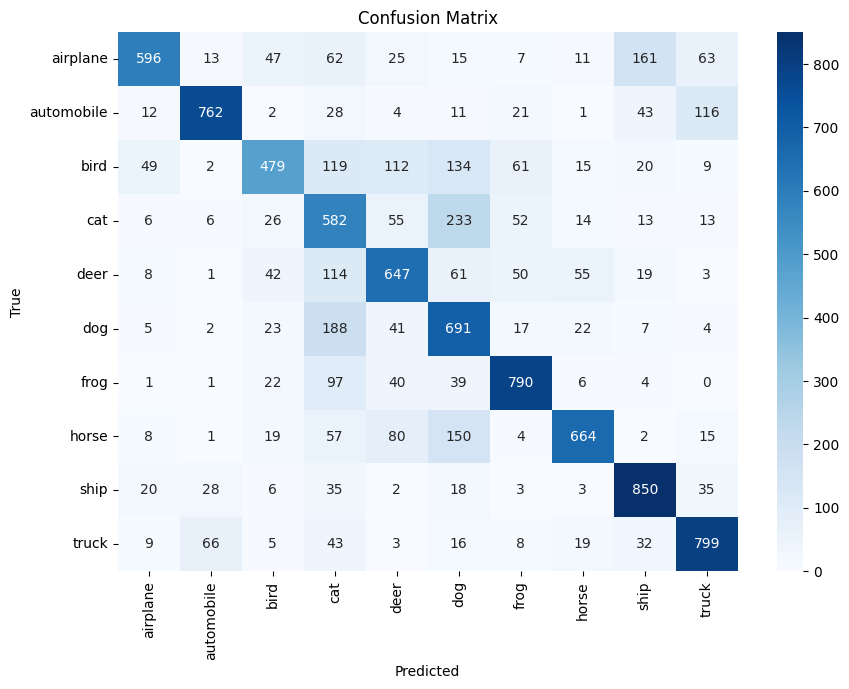

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", test_acc)

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Examples of Predictions

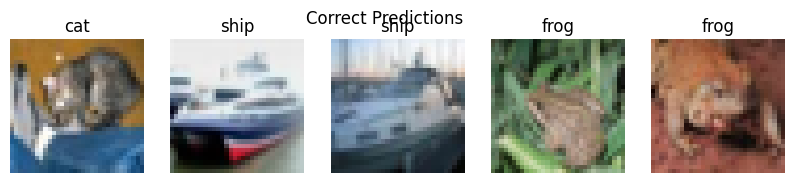

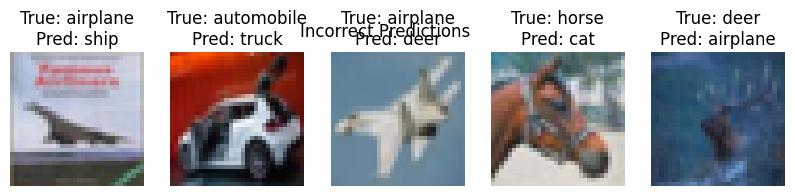

In [15]:
# Correctly classified
correct = np.where(y_pred_classes == y_true)[0]
incorrect = np.where(y_pred_classes != y_true)[0]

# Show some correct predictions
plt.figure(figsize=(10,2))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(class_names[y_pred_classes[idx]])
    plt.axis('off')
plt.suptitle("Correct Predictions")

plt.show()

# Show some incorrect predictions
plt.figure(figsize=(10,2))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")

plt.show()


Experimentation with Model Improvements

Re-trained the model with different optimizers like:

SGD – showed slower learning, required tuning learning rate.

RMSProp – showed slightly faster convergence.

Compared performance of each optimizer in a table:

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop

# Try different optimizers
optimizers = {
    "Adam": Adam(),
    "SGD": SGD(),
    "RMSprop": RMSprop()
}

results = {}

for name, opt in optimizers.items():
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\nTraining with {name} optimizer:")
    model.fit(x_train_new, y_train_new, epochs=5, validation_data=(x_val, y_val), verbose=0)
    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    results[name] = acc
    # Show results after training all optimizers
print("\nFinal Test Accuracy for Each Optimizer:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")




Training with Adam optimizer:
